## Ellen White
#### Email: egwhite518@gmail.com
#### Cell: 224-619-0445

In [1]:
import pandas as pd
import numpy as np
# import dataset: https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction
dataset = pd.read_csv("HR Analysis/HR-Employee-Attrition.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Prework - Data Cleansing

In [2]:
# Identify Unique/Null Values
nulls = pd.DataFrame({
    'Unique':dataset.nunique(),
    'Null':dataset.isna().sum(),
})
print(nulls)
print(len(dataset.columns))

                          Unique  Null
Age                           43     0
Attrition                      2     0
BusinessTravel                 3     0
DailyRate                    886     0
Department                     3     0
DistanceFromHome              29     0
Education                      5     0
EducationField                 6     0
EmployeeCount                  1     0
EmployeeNumber              1470     0
EnvironmentSatisfaction        4     0
Gender                         2     0
HourlyRate                    71     0
JobInvolvement                 4     0
JobLevel                       5     0
JobRole                        9     0
JobSatisfaction                4     0
MaritalStatus                  3     0
MonthlyIncome               1349     0
MonthlyRate                 1427     0
NumCompaniesWorked            10     0
Over18                         1     0
OverTime                       2     0
PercentSalaryHike             15     0
PerformanceRating        

In [3]:
# Drop redundant columns that don't differentiate employee data
# No need to check for duplicate employees because the number of unique employee numbers is the same as the length of the DataFrame
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        print(col)
        dataset.drop(col,inplace=True,axis=1)
print(len(dataset.columns))

EmployeeCount
Over18
StandardHours
32


## Step 1: Correlation Matrix to determine which variables tend to coincide.

<AxesSubplot:>

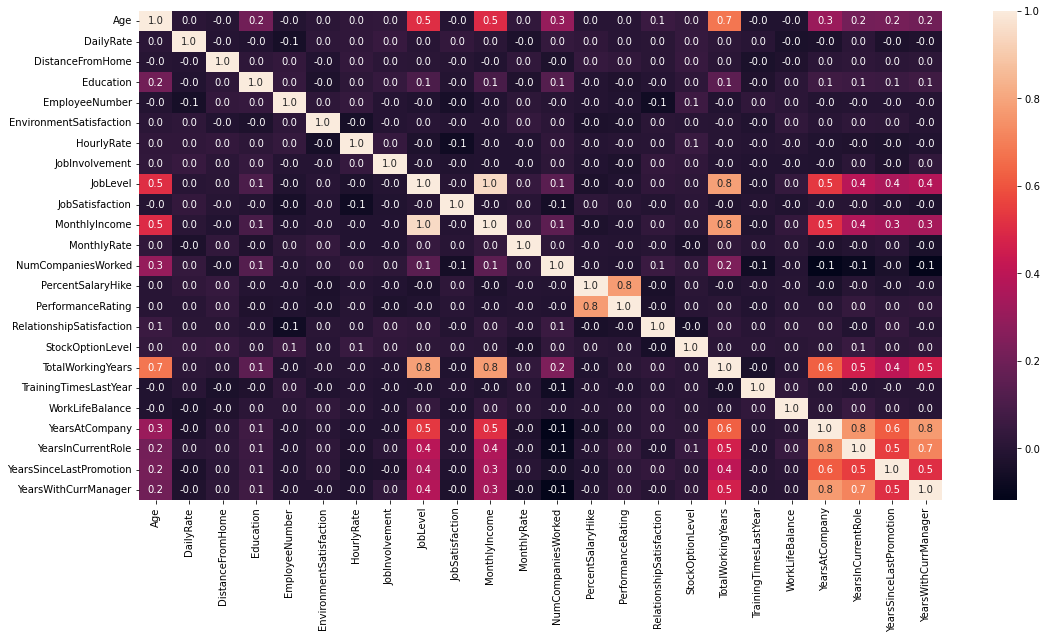

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f')

In [5]:
# Convert categorical data to numerical data
objects = list(dataset.select_dtypes(include='O'))
print(objects)
numerical = pd.get_dummies(data=dataset, columns=objects)
numerical

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,2062,4,42,2,3,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2064,2,87,4,2,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,0,0,1,0,0,1,0,1,0


In [6]:
plt.figure(figsize=(18,9))
x = numerical.drop(columns = ['EmployeeNumber'])
corrs = x.corr()
np.fill_diagonal(corrs.values, -2)
#corrs
#sns.heatmap(corrs, mask = (np.abs(corrs) >= 0.8))

<Figure size 1296x648 with 0 Axes>

In [7]:
def get_redundant_pairs(x):
    pairs_to_drop = set()
    cols = x.columns
    for i in range(0, x.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(x, n=10):
    au_corr = x.corr().unstack()
    labels_to_drop = get_redundant_pairs(x)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Correlations")
print(get_top_correlations(x)) 

Top Correlations
JobLevel                    MonthlyIncome              0.950300
Department_Human Resources  JobRole_Human Resources    0.904983
Department_Sales            JobRole_Sales Executive    0.808869
JobLevel                    TotalWorkingYears          0.782208
PercentSalaryHike           PerformanceRating          0.773550
MonthlyIncome               TotalWorkingYears          0.772893
YearsAtCompany              YearsWithCurrManager       0.769212
                            YearsInCurrentRole         0.758754
YearsInCurrentRole          YearsWithCurrManager       0.714365
Age                         TotalWorkingYears          0.680381
dtype: float64


The most highly correlated factors are unsurprising, the highest being Job Level and Income. Years and experience contribute to higher pay. You can also see that this company has a common pay for performance philosophy as salary hikes are more correlated with performance as opposed to job level or experience.

## Step 2: Gender

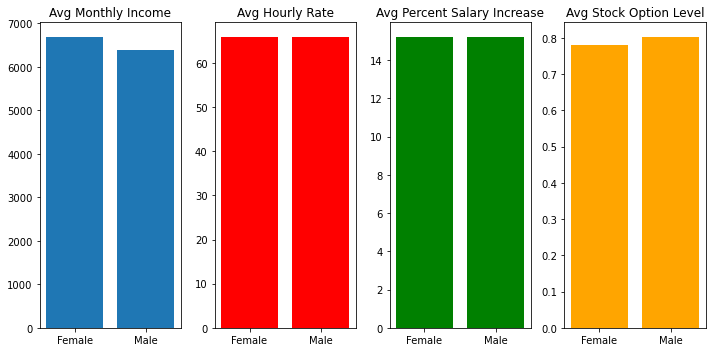

In [8]:
avgGender = dataset.groupby(['Gender']).mean()
cols = ['MonthlyIncome','HourlyRate','PercentSalaryHike','StockOptionLevel']

fig, axes = plt.subplots(1, len(cols), figsize=(10, 5))

axes[0].bar(avgGender.index, avgGender['MonthlyIncome'])
axes[0].set_title('Avg Monthly Income')

axes[1].bar(avgGender.index, avgGender['HourlyRate'], color = 'red')
axes[1].set_title('Avg Hourly Rate')

axes[2].bar(avgGender.index, avgGender['PercentSalaryHike'], color = 'green')
axes[2].set_title('Avg Percent Salary Increase')

axes[3].bar(avgGender.index, avgGender['StockOptionLevel'], color = 'orange')
axes[3].set_title('Avg Stock Option Level')

plt.tight_layout()
plt.show()

Can conclude that this company doesn't have a pay equity problem to address

Exploring other data

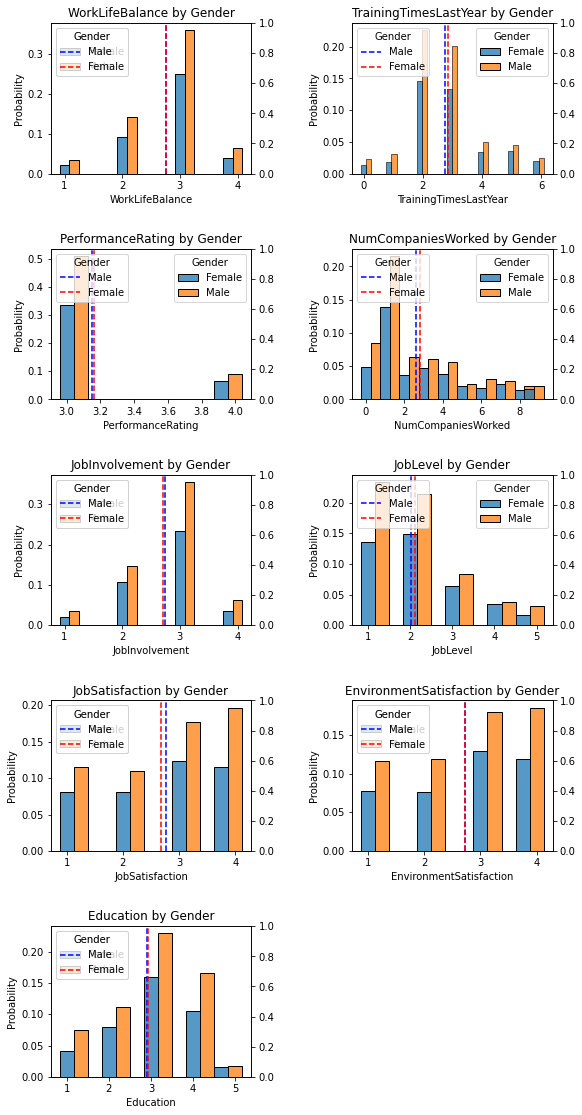

In [9]:
cols = ['WorkLifeBalance','TrainingTimesLastYear','PerformanceRating','NumCompaniesWorked',
   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
   'EnvironmentSatisfaction','Education']
plt.figure(figsize=(9, 36))
for i, col in enumerate(cols):
    gender_means = dataset.groupby('Gender').mean()

    axes = plt.subplot(len(cols), 2, i + 1)
    sns.histplot(dataset, x=dataset[col], hue="Gender", stat="probability", multiple="dodge", shrink=2)
    
    ax = axes.twinx()
    male_line = ax.axvline(gender_means.loc['Male', col], color='blue', linestyle='--', label='Male')
    female_line = ax.axvline(gender_means.loc['Female', col], color='red', linestyle='--', label='Female')

    axes.set_xlabel(col)
    axes.set_title(f'{col} by Gender')

    ax.legend(loc='upper right')
    plt.legend(title='Gender',loc = 'upper left')
    
plt.subplots_adjust(hspace=.5, wspace = .5)


plt.show()
# ideally figure out how to keep legends from overlapping

Most factors are equal, on average, amongst males and females. Males **slightly** tend to be more satisfied with their jobs, while women **slightly** tend to have worked at slightly more companies.

## Step 3: Attrition Patterns 
Reminder, when attrition = yes, that means the employee left the company.

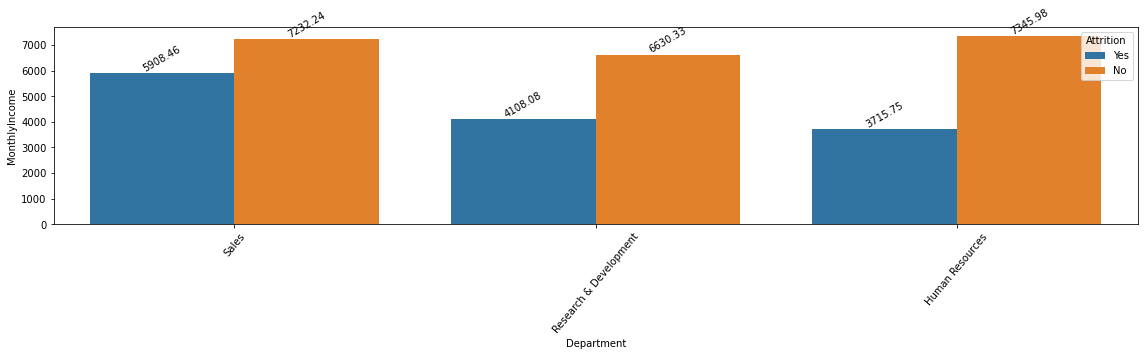

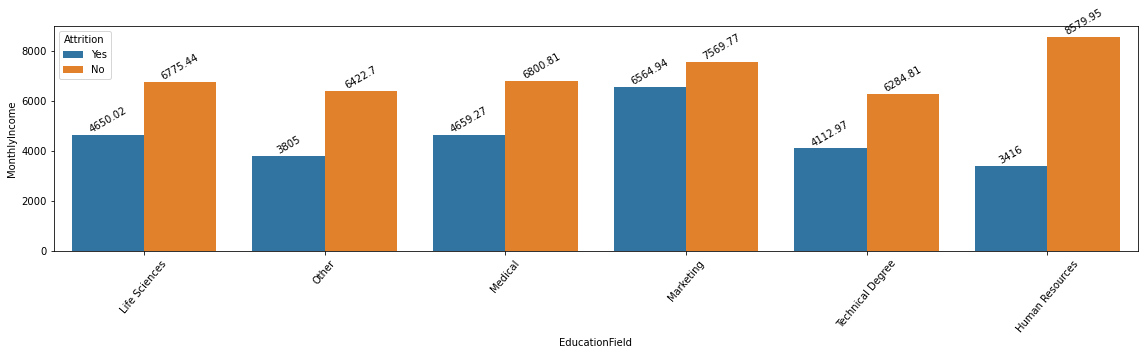

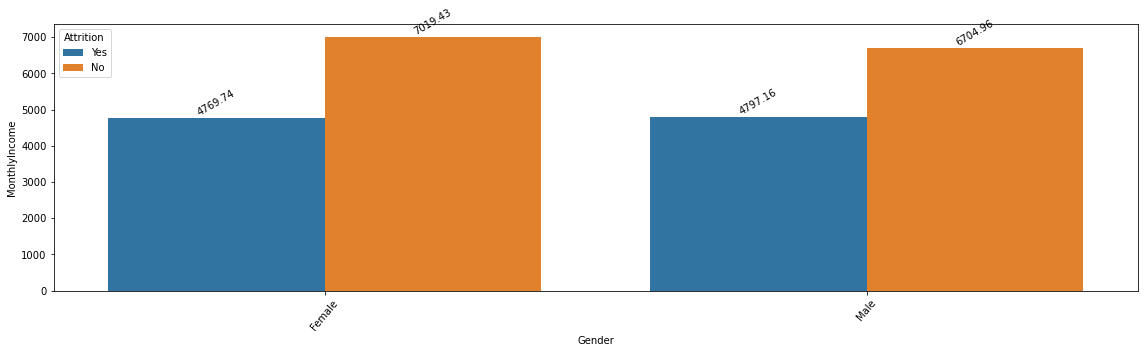

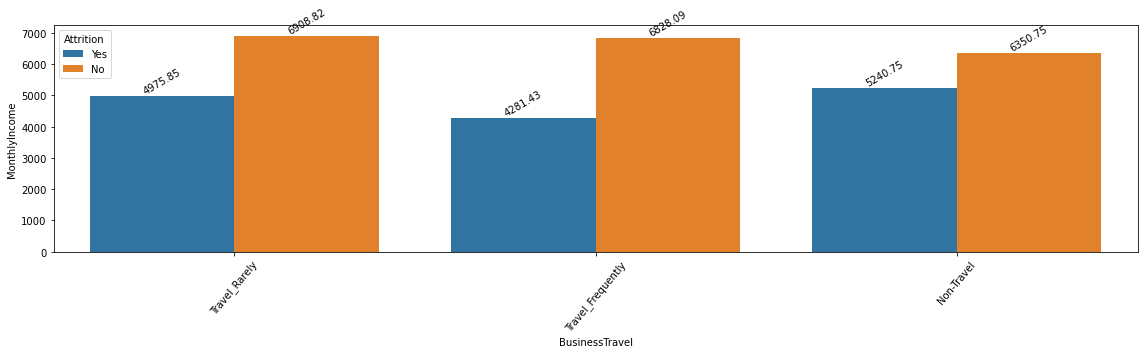

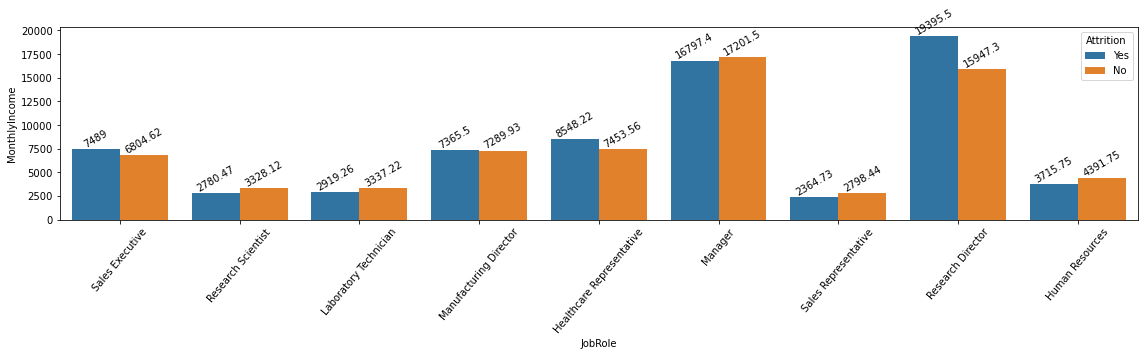

In [10]:
cols = ['Department','EducationField','Gender','BusinessTravel','JobRole']

for i in cols:
    fig, axes = plt.subplots(figsize=(16,5))
    sns.barplot(x=dataset[i], y=dataset['MonthlyIncome'], hue=dataset['Attrition'], ci=None)
    plt.xticks(rotation=50,fontsize=10)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=30,fontsize=10)
    plt.tight_layout()
    plt.show()

You can see that income isn't always the driving force of attrition. For example, the research directors who left tended to have higher salaries than the research directors who stayed. This is a case where the company may want to explore issues in the research department that may be driving employees out.

These are some additional factors independent of income. You'll see there's no overwhelming evidence of turnover in any of these cases, even in the case of low environmental/job satisfaction.

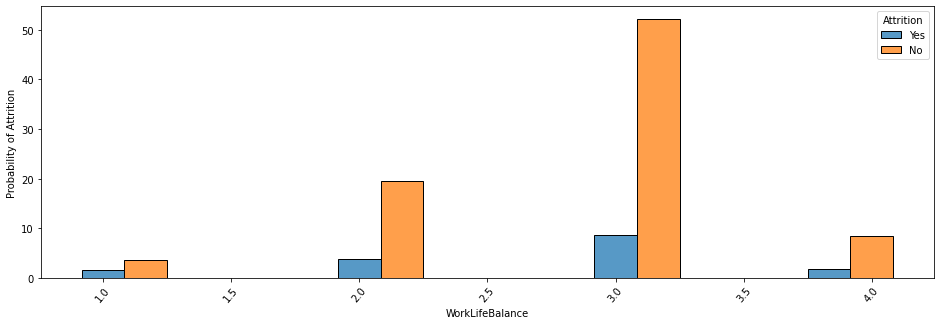

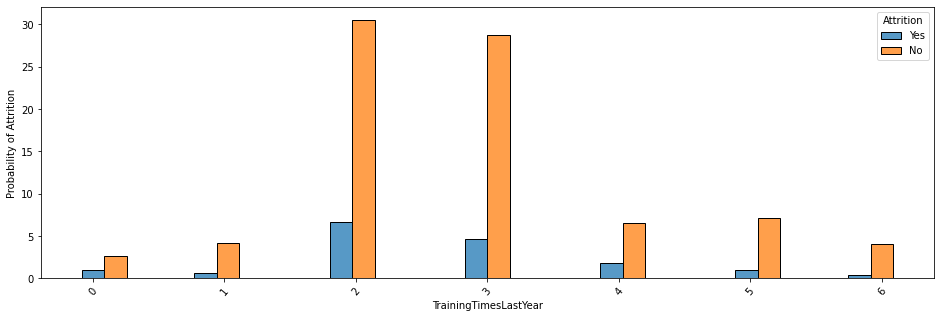

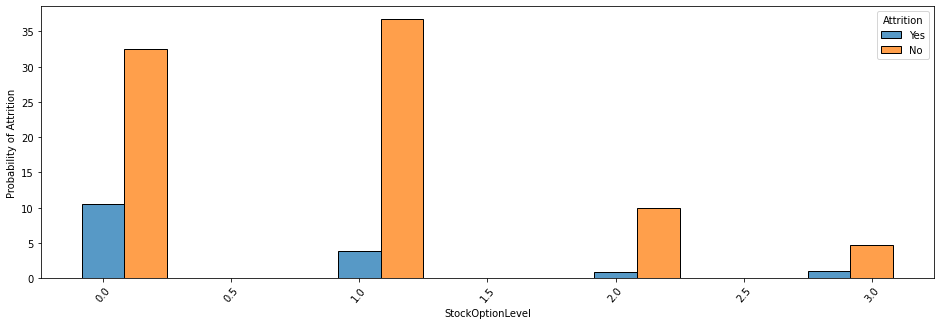

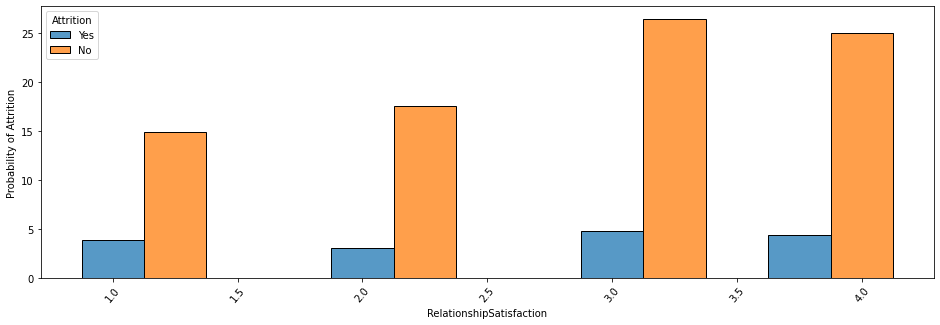

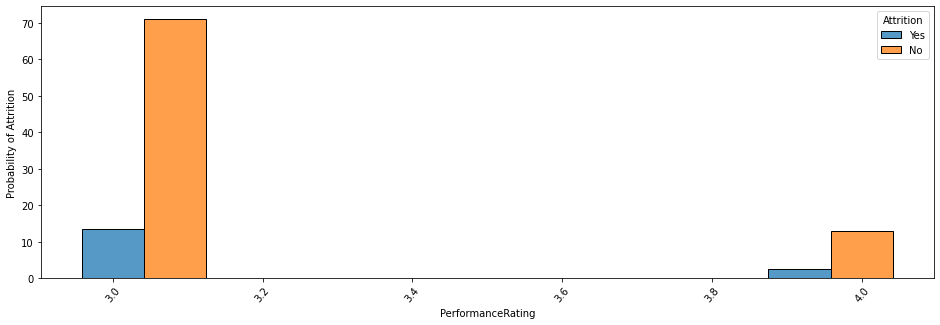

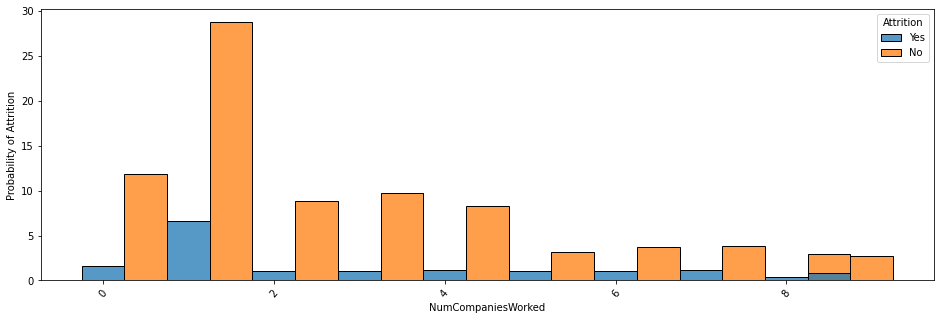

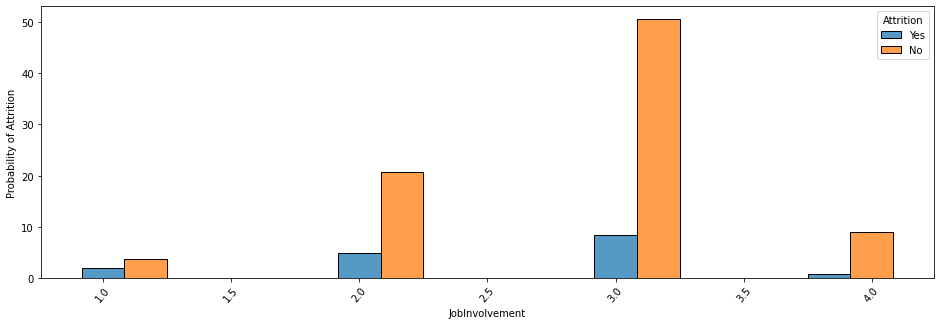

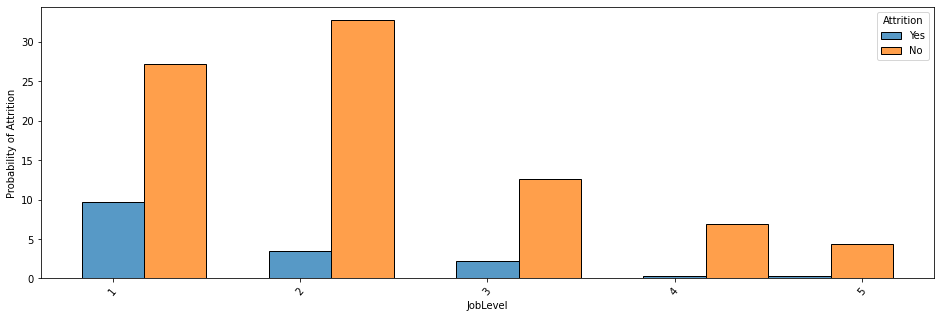

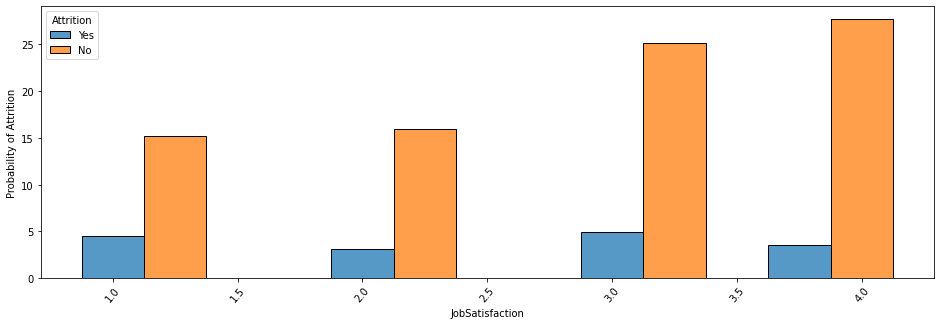

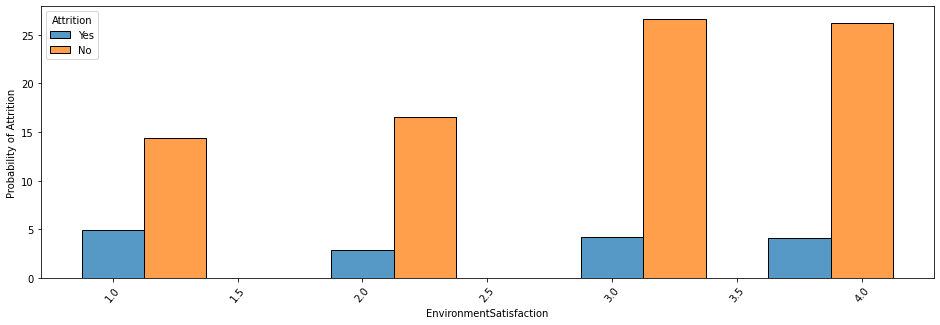

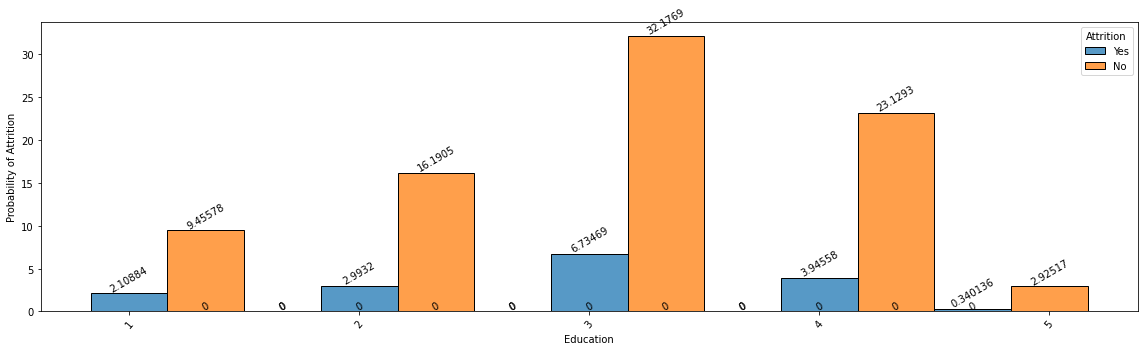

In [11]:
cols = ['WorkLifeBalance','TrainingTimesLastYear','StockOptionLevel',
    'RelationshipSatisfaction','PerformanceRating','NumCompaniesWorked',
   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
   'EnvironmentSatisfaction','Education']

for col in cols:
    fig, axes = plt.subplots(figsize=(16,5))
    sns.histplot(dataset, x=dataset[col], hue="Attrition", stat="percent", multiple="dodge", shrink = 2)
    axes.set(ylabel="Probability of Attrition")    
    plt.xticks(rotation=50,fontsize=10)
for cont in axes.containers:
    axes.bar_label(cont,rotation=30,fontsize=10)
plt.tight_layout()
plt.show()

## Step 4: Performance Prediction

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
x.head()
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Repr

I realize in the workplace, companies may not have easy access to this quantity of features, but to improve accuracy I will use them all.

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes']], x['PerformanceRating'], test_size=0.25, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print('MAE:', mae)
X_test.head()

MAE: 0.17656749614659223


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1041,28,866,5,3,4,84,3,2,1,8463,...,0,0,0,1,0,0,0,1,1,0
184,53,1084,13,2,4,57,4,2,1,4450,...,1,0,0,0,0,1,0,0,1,0
1222,24,240,22,1,4,58,1,1,3,1555,...,0,0,0,0,0,0,1,0,1,0
67,45,1339,7,3,2,59,3,3,1,9724,...,0,0,1,0,0,1,0,0,1,0
220,36,1396,5,2,4,62,3,2,2,5914,...,0,0,0,0,0,0,0,1,1,0


In [15]:
params = x.drop('PerformanceRating', axis=1)

Test first line in dataset, employee 0, and see how our models predicts their performance rating.

In [16]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [17]:
employee_data = params.loc[[0]]
prediction = model.predict(employee_data)
print(f'This employee is predicted to receive a performance rating of {prediction[0]}')

This employee is predicted to receive a performance rating of 2.8223723789723687


In [18]:
actual = x.loc[0]['PerformanceRating']

The model predicted that this employee would receive a performance score of 2.82, and the employee actually received a score of 3. Lets see if other models could be more accurate.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

prediction = dtc.predict(employee_data)

# Print the prediction
print(f'This employee is predicted to receive a performance rating of {prediction}')

This employee is predicted to receive a performance rating of [3]


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Decision Tree Classifier has a perfect score. In reality, I would train this model on a smaller, more feasible list of features, so other HR members could easily enter data. See below for an example.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x[['Age', 'JobLevel',
       'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'Gender_Female', 'Gender_Male',
       ]], x['PerformanceRating'], test_size=0.25, random_state=42)

In [24]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


employee_data = pd.DataFrame({'Age': 40, 'JobLevel':3,
       'MonthlyIncome':5000, 'TotalWorkingYears':5, 'TrainingTimesLastYear':0,
       'WorkLifeBalance':1, 'YearsAtCompany':5, 'YearsInCurrentRole':2,
       'YearsSinceLastPromotion':2, 'Gender_Female':1, 'Gender_Male':0},index=[0])

prediction = dtc.predict(employee_data.loc[[0]])

# Print the prediction
print(f'This employee is predicted to receive a performance rating of {prediction}')

This employee is predicted to receive a performance rating of [4]
